In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5,1.03,'Figure Title')

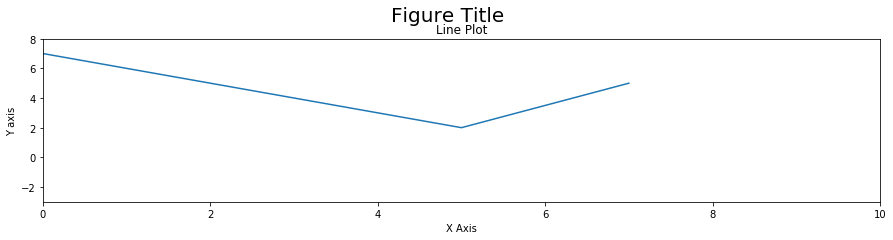

In [4]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

Text(0.5,1.03,'Figure Title')

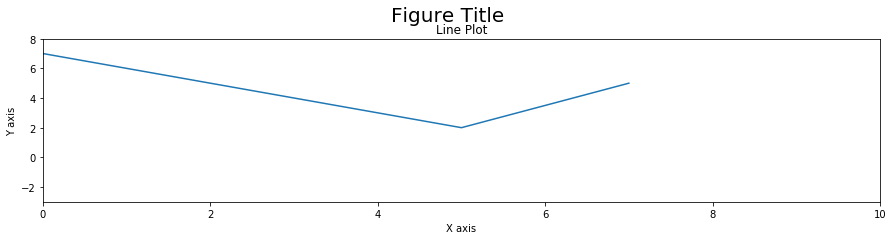

In [5]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

In [6]:
type(fig)

matplotlib.figure.Figure

In [7]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [8]:
fig.get_size_inches()

array([15.,  3.])

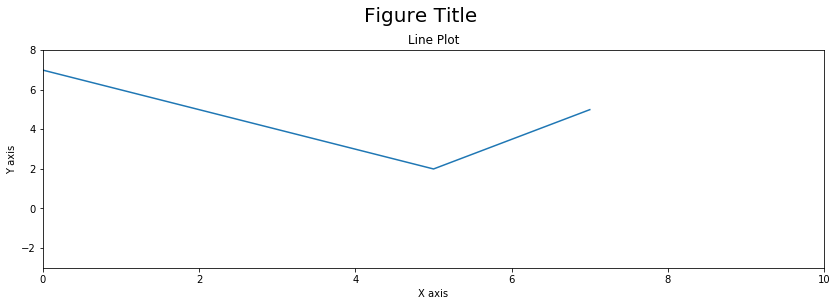

In [9]:
fig.set_size_inches(14, 4)
fig

In [10]:
fig.axes

In [11]:
fig.axes[0] is ax

True

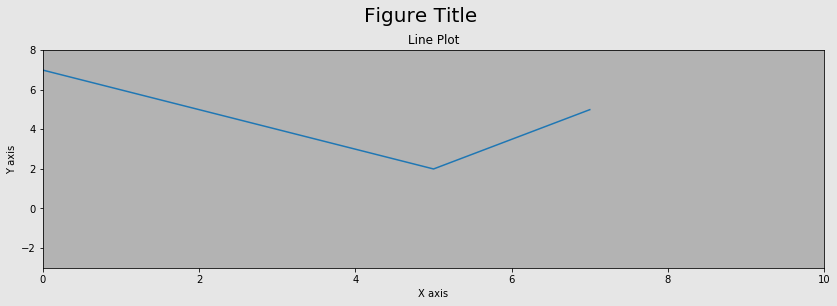

In [12]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [13]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x50814129e8>),
             ('right', <matplotlib.spines.Spine at 0x50815a1080>),
             ('bottom', <matplotlib.spines.Spine at 0x50815a1198>),
             ('top', <matplotlib.spines.Spine at 0x50815a12b0>)])

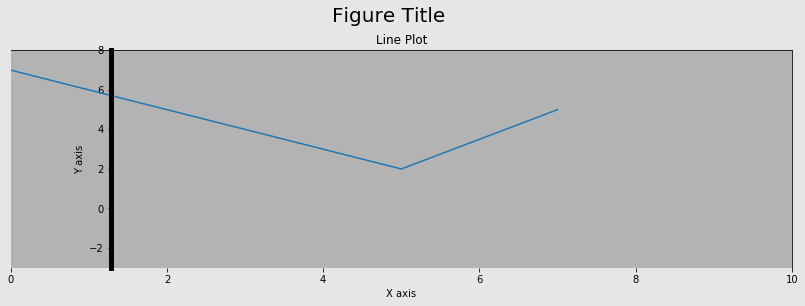

In [14]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

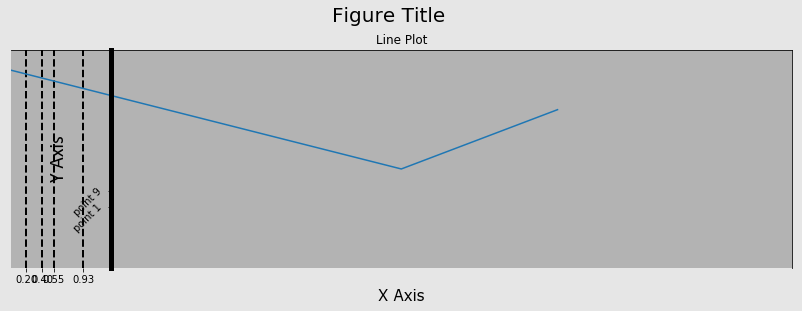

In [15]:
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

In [16]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5,22.2,'X Axis'),
  Text(1,23.2,''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x50815a6d30>,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([-3.,  7.]),
 'figure': <Figure size 1008x288 with 1 Axes>,
 'gid': None,
 'gridlines': <a list of 4 Line2D gridline objects>,
 'label': Text(0.5,22.2,'X Axis'),
 'label_position': 'bottom',
 'label_text': 'X Axis',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x50815a19e8>,
 'major_locator': <matplotlib.ticker.FixedLocator at 0x508167deb8>,
 'major_ticks': [<matplotlib.axis.XTick at 0x508159c4e0>,
 'majorticklabels': <a list of 4 Text major ticklabel objects>,
 'majorticklines': <a list of 8 Line2D ticklines objects>,
 'majorticklocs': array([0.2 , 0.4 , 0.55, 0.93]),
 'minor_formatter': <matplotlib.ticker.NullFormatter at 0x50815a1da0>,
 'minor_locator': <matplotlib.ticker.NullLocator at 0x5081412438>,
 'minor

In [17]:
movie = pd.read_csv('data/movie.csv')

med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [18]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [19]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

Text(0,0.5,'Millions of Dollars')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


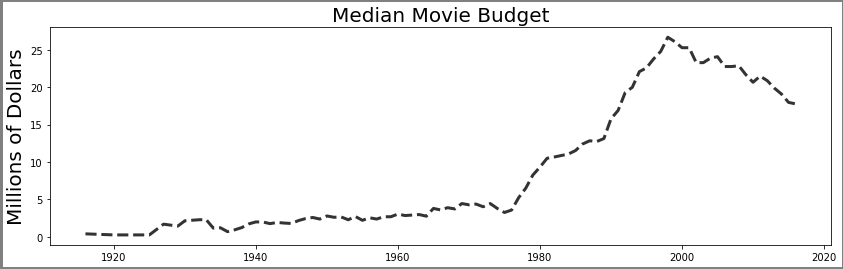

In [20]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [21]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


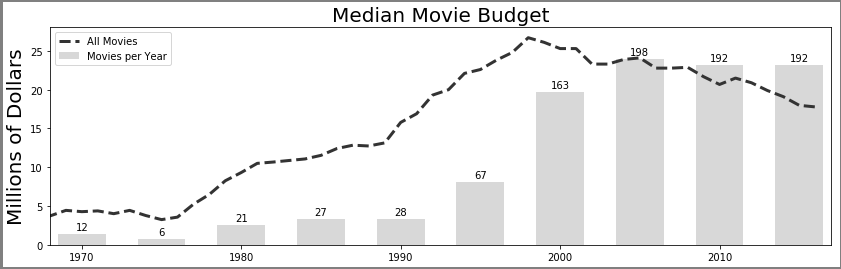

In [22]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

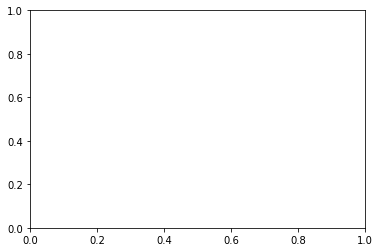

In [23]:
plot_objects = plt.subplots()

In [24]:
type(plot_objects)

tuple

In [25]:
fig = plot_objects[0]
ax = plot_objects[1]

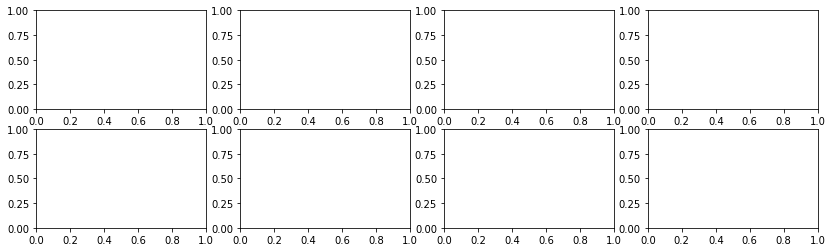

In [26]:
plot_objects = plt.subplots(2, 4, figsize=(14, 4))

In [27]:
plot_objects[1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005081A08748>,
      dtype=object)

In [28]:
fig.get_axes() == fig.axes

True

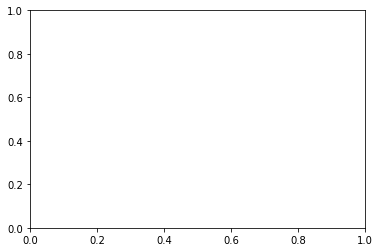

In [29]:
fig, ax = plt.subplots()

In [30]:
fig.axes == fig.get_axes()

True

In [31]:
ax.xaxis == ax.get_xaxis()

True

In [32]:
ax.yaxis == ax.get_yaxis()

True